In [1]:
import pandas as pd
data = pd.read_csv("/Users/emily/Desktop/A_Z Handwritten Data.csv")

In [2]:
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

print(data.head())

X = data.drop('0', axis = 1)
y = data['0']



   0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  ...  0.639  0.640  0.641  \
0  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   
1  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   
2  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   
3  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   
4  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   

   0.642  0.643  0.644  0.645  0.646  0.647  0.648  
0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0  

[5 rows x 785 columns]


In [3]:
import torchvision.transforms as transforms
import torch
from torch import nn
import torch.nn.functional as F

In [4]:
alphabet_counter = np.zeros(26, dtype='int')
alphabet_counter

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [5]:
alphabet_counter = np.zeros(26, dtype='int')
alphabet_counter
y_int = np.int0(y)
y_int = np.int0(y)
for i in y_int:
    alphabet_counter[i] += 1
alphabet_counter


array([13869,  8668, 23409, 10134, 11440,  1163,  5762,  7218,  1120,
        8493,  5603, 11586, 12336, 19010, 57825, 19341,  5812, 11566,
       48419, 22495, 29008,  4182, 10784,  6272, 10859,  6076])

In [6]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, shuffle=True)

train_x = np.reshape(train_x.values, (train_x.shape[0], 28, 28))
test_x = np.reshape(test_x.values, (test_x.shape[0], 28, 28))

print("Train data shape: ", train_x.shape)
print("Test data shape: ", test_x.shape)

Train data shape:  (297960, 28, 28)
Test data shape:  (74490, 28, 28)


In [7]:
word_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}

In [8]:
alphabets = []
for i in word_dict.values():
    alphabets.append(i)

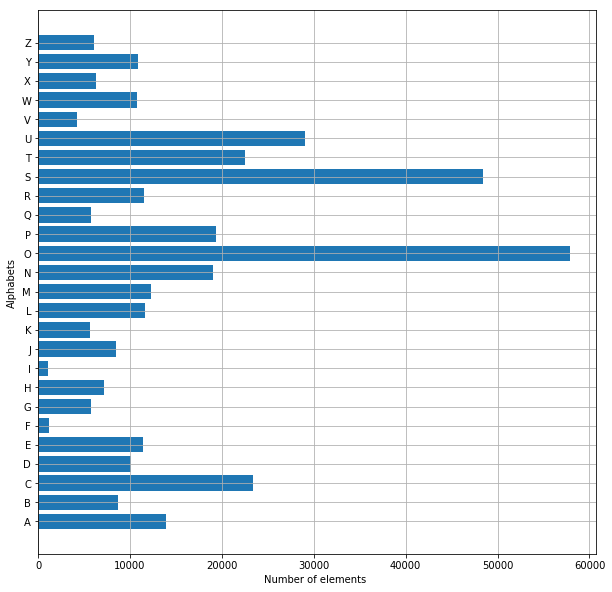

In [9]:
fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.barh(alphabets, alphabet_counter)
plt.xlabel("Number of elements ")
plt.ylabel("Alphabets")
plt.grid()
plt.show()

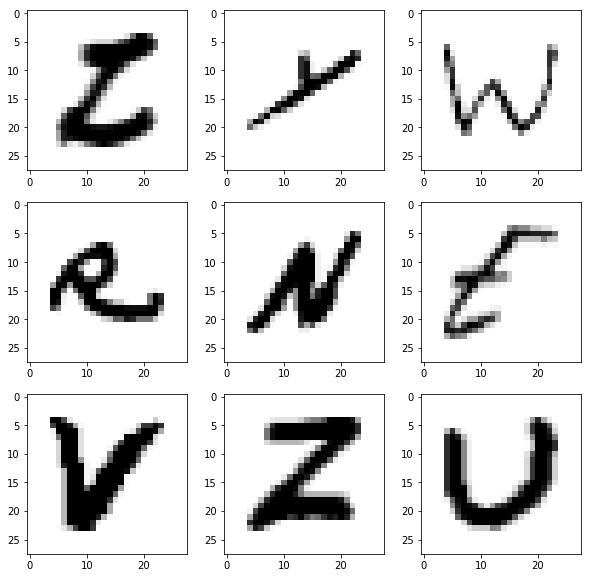

In [10]:
fig, ax = plt.subplots(3,3, figsize = (10,10))
axes = ax.flatten()

for i in range(9):
   # _, shu = cv2.threshold(shuff[i], 30, 200, cv2.THRESH_BINARY)
    axes[i].imshow(np.reshape(train_x[i], (28,28)), cmap="Greys")
plt.show()

In [11]:
torch_train_x = []
for i in range(len(train_x)):
    torch_train_x.append(torch.from_numpy(train_x[i]))

In [12]:
#print(torch_train_x[:10])
d = {}
for i in range(256):
    d[str(i)]=0
for e in train_x[:20]:
    for ee in e:
        #ca = np.bincount(ee)
        for i in range(255):
            d[str(i)]+=ee.tolist().count(i)

{'0': 11996, '1': 41, '2': 59, '3': 21, '4': 15, '5': 18, '6': 18, '7': 17, '8': 13, '9': 16, '10': 13, '11': 15, '12': 11, '13': 27, '14': 16, '15': 10, '16': 13, '17': 10, '18': 10, '19': 8, '20': 12, '21': 16, '22': 12, '23': 12, '24': 6, '25': 12, '26': 15, '27': 14, '28': 11, '29': 12, '30': 14, '31': 10, '32': 13, '33': 5, '34': 4, '35': 6, '36': 12, '37': 7, '38': 7, '39': 10, '40': 10, '41': 9, '42': 10, '43': 7, '44': 9, '45': 9, '46': 9, '47': 7, '48': 5, '49': 12, '50': 11, '51': 17, '52': 9, '53': 7, '54': 14, '55': 13, '56': 7, '57': 9, '58': 8, '59': 6, '60': 7, '61': 8, '62': 8, '63': 11, '64': 24, '65': 8, '66': 9, '67': 17, '68': 5, '69': 4, '70': 16, '71': 7, '72': 5, '73': 11, '74': 4, '75': 11, '76': 5, '77': 13, '78': 8, '79': 5, '80': 3, '81': 7, '82': 9, '83': 5, '84': 6, '85': 8, '86': 4, '87': 8, '88': 7, '89': 1, '90': 8, '91': 5, '92': 4, '93': 7, '94': 9, '95': 14, '96': 10, '97': 9, '98': 9, '99': 3, '100': 14, '101': 7, '102': 19, '103': 8, '104': 6, '105'

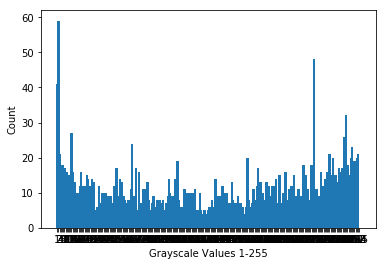

In [13]:
print(d)
d.pop('0')
plt.bar(d.keys(),d.values(),2)
plt.xlabel("Grayscale Values 1-255")
plt.ylabel("Count")
plt.show()

In [14]:
train_X = torch.from_numpy(train_x)
epoch = 3
train_X.shape

for i in range(0, epoch):
    print(train_y[i]) 
    print(train_X[i])



0
tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   3,  50, 163, 249, 246, 179,  27,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  14,  49,  67,  67,
          67, 115, 183, 217, 255, 255, 255, 247, 180,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0, 

KeyError: 2

In [15]:
train_X.shape

torch.Size([297960, 28, 28])

In [73]:
input_size = 784
output_size = 10

class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 26),
            nn.LogSoftmax(dim=1)
        )
  
    def forward(self, x):
        #x = self.flatten(x)
        #print(x.shape)
        logits = self.linear_relu_stack(x)
        return logits

    

In [83]:
from torch import optim

model = Model()
loss_fn = nn.CrossEntropyLoss()
epoch = 1;

optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
train_Y = torch.from_numpy(train_y.values).to(dtype=torch.long)

def train(epoch):
    for inp, target in zip(train_X, train_Y):
        inpt = inp.view(28*28).to(dtype=torch.long) #.view((1, 1, 28, 28))
        #y_tensor = torch.tensor(y_train, dtype=torch.long, device=device)
        optimizer.zero_grad()
        prediction = model(inpt)
        loss = loss_fn(prediction, target)
        loss.backward()
        optimizer.step()

train(0)

RuntimeError: expected scalar type Long but found Float

In [84]:
def test():
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for inp, target in zip(test_X, test_Y):
            output = model(inp)
            test_loss += F.loss_fn(output, target)
            pred = output.data.max(1, keepdim=True)[1]
            correct += pred.eq(target.data.view_as(pred)).sum()
    test_loss /= len(test_Y)
    test_losses.append(test_loss)
    print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format( test_loss, correct, len(test_Y),100. * correct / len(test_Y)))

In [76]:
train_X[0].view(28*28).to(dtype=torch.long)


tensor([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   3,  50, 163, 249, 246, 179,  27,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  14,  49,  67,  67,
         67, 115, 183, 217, 255, 255, 255, 247, 180,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,  90, 192, 2

In [78]:
m = nn.Linear(28*28, 512)
m(train_X[0].view(28*28).to(dtype=torch.long))

RuntimeError: expected scalar type Long but found Float